# Implementace domácího úkolu - rybí regrese 

In [1]:
import pandas as pd
import numpy as np

# učení modelů obsahuje určitou náhodnost
# nastavením random.seed zaručíme všem stejné výsledky
np.random.seed(42) 

In [2]:
# sklearn rádo vypisuje různé warningy během učení modelu, např. že učení nechce zkonvergovat
# ač tato informace je důležitá, nyní se tím nechceme rozptylovat a tyto warningy vypneme
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

- Načtěte si data pomocí pandas, vyberte požadované sloupce, které budete používat. 


In [3]:
def read_fish_data(filename):
    return (
        pd.read_csv(filename, index_col=0)
        .rename(columns={
            "Species": "druh",
            "Weight": "vaha",
            "Length1": "delka1",
            "Length2": "delka2",
            "Length3": "delka3",
            "Height": "vyska",
            "Width": "sirka"})
        .replace({
            "Bream": "Cejn",
            "Parkki": "Parma",
            "Perch": "Okoun",
            "Pike": "Štika",
            "Roach": "Plotice",
            "Smelt": "Šprota",
            "Whitefish": "Síh"})
    )

In [4]:
fish_data = read_fish_data("fish_data.csv")
fish_data = fish_data.drop(columns=["ID"])
fish_data

,druh,vaha,delka1,delka2,delka3,vyska,sirka
0,Cejn,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Cejn,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Cejn,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Cejn,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Cejn,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
153,Šprota,9.8,11.4,12.0,13.2,2.2044,1.1484
154,Šprota,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Šprota,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Šprota,12.2,12.1,13.0,13.8,2.2770,1.2558


**Instrukce**:
V úkolech už je předpřipraven kód, stačí když doplníte tam, kde jsou `...` nebo `____`. 

# Úkol 1: výběr vstupů a výstupů, rozdělení na trénovací a testovací data

- Zvol si sloupec, který budeš používat jako odezvu (**vaha**). Do proměnné **X** ulož sloupce, které budeš používat jako příznaky, do proměnné **y** sloupec s odezvou.

*V teorii strojového učení se vstupy modelu (příznaky, vstupní proměnné) typicky označují písmenem X a výstupy písmenem y. Takto se často označují i proměnné v kódu. X představuje matici (neboli tabulku), kde každý řádek odpovídá jednomu datovému vzorku a každý sloupec jednomu příznaku (vstupní proměnné). y je vektor, neboli jeden sloupec s odezvou.*

In [5]:
y = fish_data["vaha"]
X = fish_data.drop(columns=["vaha"])

- Rozděl data na trénovací a testovací. Všimni si, že máme v datech různé druhy ryb, na co si dát pozor? 

*Metoda  [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train%20test%20split#sklearn.model_selection.train_test_split)  nám data rozdělí náhodně na trénovací a testovací sadu. Velikost testovací množiny můžeme specifikovat parametrem test_size, jeho přednastavená (default) hodnota je 0.25, t. j. 25%.*

In [6]:
from sklearn.model_selection import train_test_split 

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, stratify=X["druh"])

# Úkol 2: převeď data na numerické hodnoty a přeškáluj je

+ Překóduj potřebné sloupce pomocí OneHotEncoding. 

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

categorical_columns = ["druh"] 

transformer = make_column_transformer(
    (OneHotEncoder(sparse_output=False), categorical_columns),
    remainder="passthrough"
)

X_train_onehot = transformer.fit_transform(X_train_raw)
X_test_onehot = transformer.transform(X_test_raw)

pd.DataFrame(X_train_onehot, columns=transformer.get_feature_names_out())

,onehotencoder__druh_Cejn,onehotencoder__druh_Okoun,onehotencoder__druh_Parma,onehotencoder__druh_Plotice,onehotencoder__druh_Síh,onehotencoder__druh_Šprota,onehotencoder__druh_Štika,remainder__delka1,remainder__delka2,remainder__delka3,remainder__vyska,remainder__sirka
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.8,11.3,12.6,1.9782,1.2852
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,26.8,29.7,34.7,13.6024,4.9274
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17.8,19.6,20.8,5.1376,3.0368
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,33.5,37.0,42.6,18.9570,6.6030
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,56.0,60.0,64.0,9.6000,6.1440
...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.8,15.0,16.0,3.8240,2.4320
88,0.0,0.0,0.0,0.0,0.0,0.0,1.0,52.0,56.0,59.7,10.6863,6.9849
89,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.5,22.0,24.3,6.6339,3.5478
90,0.0,1.0,0.0,0.0,0.0,0.0,0.0,34.0,36.5,39.0,10.8810,6.8640


+ Přeškáluj sloupce pomocí StandardScaler.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_onehot)

X_train = scaler.fit_transform(X_train_onehot)
X_test = scaler.transform(X_test_onehot)

# Odbočka: co jsou to ty *hyper-parametry*? 

U příkladů s černými krabičkami v první hodině jsme si (za vašimi zády) několikrát trochu pomohli a 
krabičce jsme předali na začátku nějaké parametry. Krabička totiž často umožňuje uživateli, aby si ji nakonfiguroval. V terminologii krabiček si můžeme představit, že krabička má na sobě různé páčky, kterými se dá seřídit. Těmito páčkami se nastavují tzv. **hyper-parametry** modelu. Všechny modely, které najdeš v knihovně Scikit-learn, mají nějaké výchozí nastavení a půjdou použít i bez toho, aby ses nastavením těchto hyper-parametrů zabývala.
V případě, že model nedává uspokojivý výsledek, můžeš zkusit tyto parametry upravit, např. vyzkoušet několik různých nastavení a porovnat hodnotu metriky na testovací množině.

U seznamu výše máme některé hyperparametry uvedené. Parametry často souvisejí s regularizací (výše *alpha*, *C*). **Regularizace** znamená, že model kromě toho, že se snaží nafitovat tak, aby odpovídal datům (dával správné odpovědi), zohledňuje nějaké další kriterium. Typicky toto kritérium hlídá, aby výstup modelu moc neosciloval, apod. Podobně jako jsi v příkladu s krajinou říkala, že řešení volíš tak, aby bylo *plynulé*, *hezké*, *odpovídalo obvyklým* krajinám. 

Proces výběru modelu včetně jeho parametrů se nazývá **model selection**, v knihovně Scikit-learn najdeš nástroje, které ti mohou pomoci, pod heslem [Model selection](https://scikit-learn.org/stable/model_selection.html).

# Úkol 3: výběr modelu a učení

- Vyber si několik regresních modelů a zkus je použít. 

Pro dnešek možno zkusit:

  - [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) 
 
  - [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)
      + hyperparametry: 
          * alpha, float, default=1.0 
 
- [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR)        
     + hyperparametry:
          * kernel, default rbf, one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’
          * C, float, optional (default=1.0)

In [9]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR

In [10]:
model_zoo = {
    "linear_regression": LinearRegression(),
    "lasso_var1": Lasso(alpha=1.0),
    "lasso_var2": Lasso(alpha=1e-03),
    "SVR_rbf": SVR(kernel="rbf", C=1e04),
    "SVR_poly": SVR(kernel="poly",C=1e04),
}

+ K trénovaní (fitování) slouží metoda `fit`, k predikci pro nové vzory metoda `predict`. 
```
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
```

+ Metriku nemusíš programovat, k dispozici máš `mean_absolute_error`, `mean_squared_error` a `r2_score`.
```
  metrika = mean_absolute_error(y_test, pred)
```  

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def fit_and_eval(X_train, y_train, X_test, y_test, model, name):
    """ 1. Natrénuje model na trénovací množině.
        2. Spočte hodnoty metrik na trénovací i testovací množině.
        vrátí slovník ve tvaru {"název metriky": hodnota} 
    """ 
    print("Zpracovávám model", name)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train) 
    y_test_pred = model.predict(X_test)
    
    return {
        "MAE_train": mean_absolute_error(y_train, y_train_pred),
        "MSE_train": mean_squared_error(y_train, y_train_pred),
        "MAE_test": mean_absolute_error(y_test, y_test_pred),
        "MSE_test": mean_squared_error(y_test, y_test_pred),
        "r2_score_train": r2_score(y_train, y_train_pred),
        "r2_score_test": r2_score(y_test, y_test_pred),
    }

In [12]:
results = []
for name, model in model_zoo.items(): 
    result = fit_and_eval(X_train, y_train, X_test, y_test, model, name)
    result["model"] = name
    results.append(result)
    
pd.DataFrame(results)

Zpracovávám model linear_regression
Zpracovávám model lasso_var1
Zpracovávám model lasso_var2
Zpracovávám model SVR_rbf
Zpracovávám model SVR_poly


,MAE_train,MSE_train,MAE_test,MSE_test,r2_score_train,r2_score_test,model
0,60.263593,7077.135078,62.017417,7626.545694,0.941510,0.937313,linear_regression
1,61.362366,7649.082089,58.339662,7984.587830,0.936783,0.934370,lasso_var1
2,60.116033,7434.346823,57.781771,7692.473560,0.938558,0.936771,lasso_var2
3,18.993632,1429.913015,25.453766,1972.497627,0.988182,0.983787,SVR_rbf
4,19.377471,1484.594171,38.221427,16012.248658,0.987730,0.868387,SVR_poly


# Úkol 4: výběr modelu 

Naučili jsme několik modelů. Zamysli se teď na chvilku, který by sis vybrala a proč. 
Označme si jej jako `best_model`.  Můžeš si i zkusit pohrát s hyperparametry a zvolit jiné nastavení.

In [13]:
# doplň jméno modelu, který jsi vybrala

best_model = model_zoo["SVR_rbf"]

# A pozor, překvapení ...  další testovací množina

Data jsme si rozdělili na trénovací a testovací. Trénovací jsme použili na učení modelu. 
**Ale pozor!** Testovací množinu jsme použili k výběru modelu. Metrika na testovací množině nám tedy 
nedává nezávislý odhad toho, jak se bude náš model chovat na neznámých datech. Byl totiž vybrán tak, 
aby dával dobré výsledky na testovací množině. 

Testovací množina nám slouží jako odhad generalizačních schopností modelu. Neměla by ale být použita ani při učení,
ani při výběru modelu. Část, kterou si oddělíme na "testování" pro účely výběru modelu, nazýváme správně 
**validační** množina. 
**Pozor:** Pokud jsme ale tuto validační množinu použili k výběru modelu, nesmíme ji používat k samotnému hodnocení generalizačních schopností tohoto modelu. 

A proto teď přichází opravdová testovací data, načtěte je ze souboru `fish_data_test.csv`.

In [14]:
test_data = read_fish_data("fish_data_test.csv")

test_data.pop("ID")
y_real_test = test_data.pop("vaha")
X_real_test_raw = test_data 

X_real_test_transformed = transformer.transform(X_real_test_raw)
X_real_test = scaler.transform(X_real_test_transformed)

In [15]:
y_pred_test = best_model.predict(X_real_test)

print(f"MAE {mean_absolute_error(y_real_test, y_pred_test):.3f}")
print(f"MSE {mean_squared_error(y_real_test, y_pred_test):.3f}")
print(f"R2  {r2_score(y_real_test, y_pred_test):.3f}")

MAE 41.858
MSE 6432.307
R2  0.956


In [16]:
data_with_pred = X_real_test_raw.assign(skutecna_vaha=y_real_test).assign(predikovana_vaha=y_pred_test)
data_with_pred

,druh,delka1,delka2,delka3,vyska,sirka,skutecna_vaha,predikovana_vaha
19,Cejn,31.0,33.5,38.7,14.4738,5.7276,650.0,600.730571
22,Cejn,31.5,34.5,39.7,15.5227,5.2801,620.0,636.812761
23,Cejn,31.8,35.0,40.6,15.4686,6.1306,680.0,703.557377
24,Cejn,31.9,35.0,40.5,16.2405,5.5890,700.0,714.918889
30,Cejn,35.0,38.5,44.1,18.0369,6.3063,920.0,912.010569
36,Plotice,16.5,18.2,20.3,5.2983,2.8217,69.0,67.342540
39,Plotice,18.6,20.0,22.2,6.2160,3.5742,120.0,121.920646
40,Plotice,19.0,20.5,22.8,6.4752,3.3516,0.0,123.105908
43,Plotice,20.4,22.0,24.7,5.8045,3.7544,150.0,119.379159
47,Plotice,21.1,22.5,25.0,6.4000,3.8000,160.0,143.157184


# Visualizace na závěr 

+ Pro představu si zobrazme závislost váhy ryby na délce `delka3`. Zobrazíme zvlášt pro různé druhy, tedy např. pro cejny (bream) a plotice (roach).

In [17]:
is_bream = X_real_test_raw["druh"] == "Cejn"
predicted_bream_weights = best_model.predict(X_real_test[is_bream])

is_roach = X_real_test_raw["druh"] == "Plotice"
predicted_roach_weights = best_model.predict(X_real_test[is_roach])

In [18]:
result_bream = pd.DataFrame()
result_bream["delka"] = X_real_test_raw[is_bream]["delka3"]
result_bream["skutecna_vaha"] = y_real_test[is_bream]
result_bream["predikovana_vaha"] = predicted_bream_weights
result_bream = result_bream.sort_values("delka")

result_roach = pd.DataFrame()
result_roach["delka"] = X_real_test_raw[is_roach]["delka3"]
result_roach["skutecna_vaha"] = y_real_test[is_roach]
result_roach["predikovana_vaha"] = predicted_roach_weights
result_roach = result_roach.sort_values("delka")


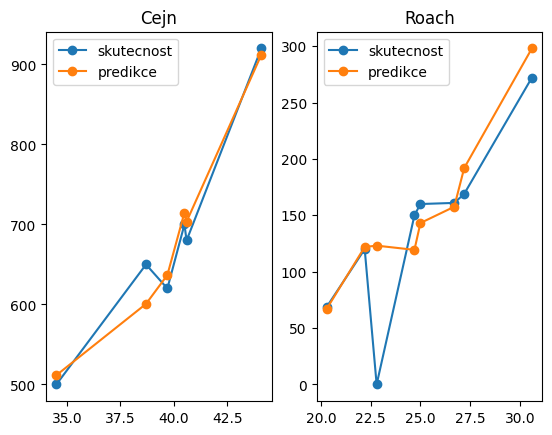

In [19]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1, 2)

ax[0].plot(result_bream["delka"], result_bream["skutecna_vaha"], label="skutecnost", marker="o");
ax[0].plot(result_bream["delka"], result_bream["predikovana_vaha"], label="predikce", marker="o");
ax[0].legend()
ax[0].set_title("Cejn")

ax[1].plot(result_roach["delka"], result_roach["skutecna_vaha"], label="skutecnost", marker="o");
ax[1].plot(result_roach["delka"], result_roach["predikovana_vaha"], label="predikce", marker="o");
ax[1].legend()
ax[1].set_title("Roach");

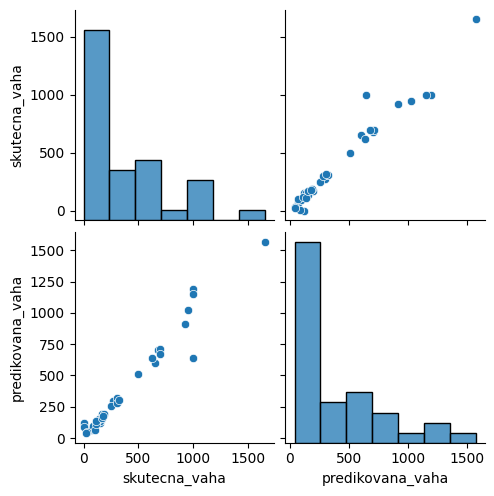

In [20]:
import seaborn as sns
sns.pairplot(data_with_pred[["skutecna_vaha", "predikovana_vaha"]]);